# **Week 6: Data Visualization Mastery**

## **Import the libraries and load the dataset**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path =  r"../Datasets/sales_data.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680
...,...,...,...,...,...,...,...
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717


In [6]:
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [7]:
df.columns

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

## **Univariate Visualization**

#### **1. Date**

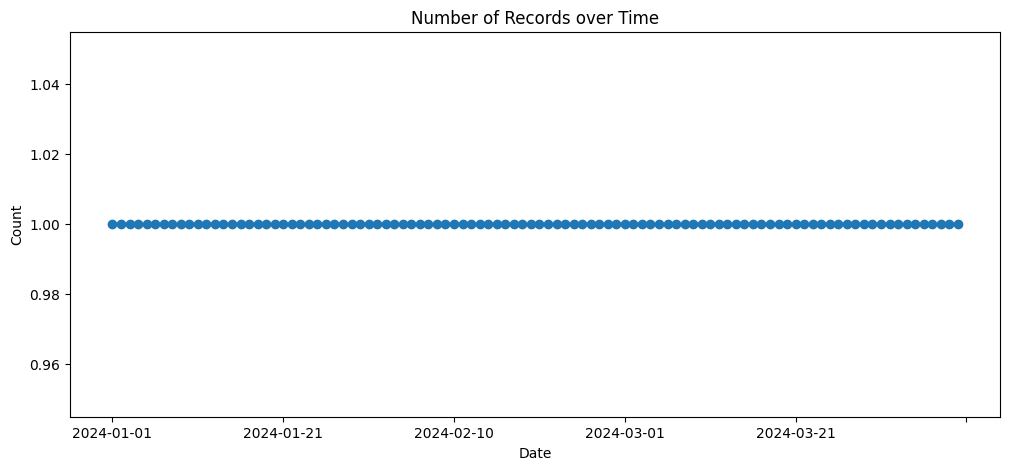

In [8]:
plt.figure(figsize=(12,5))
df['Date'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Records over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

#### 2. **Product**

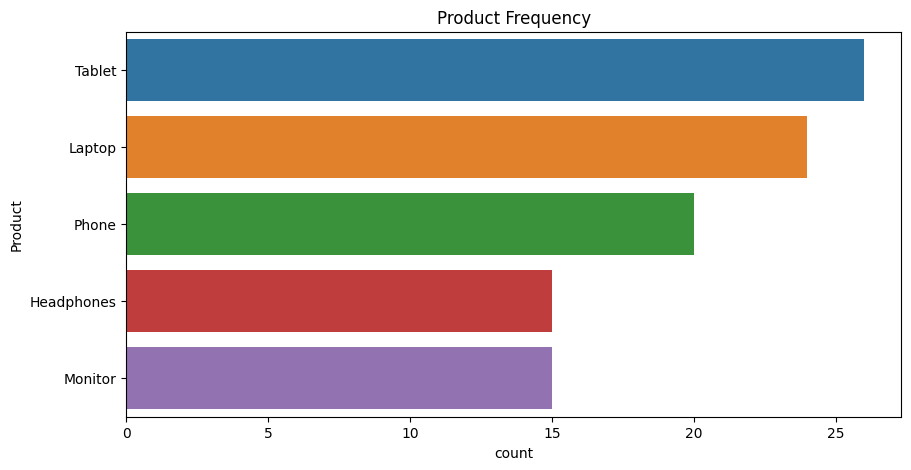

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index,palette="tab10")
plt.title("Product Frequency")
plt.show()

#### **3. Quantity**

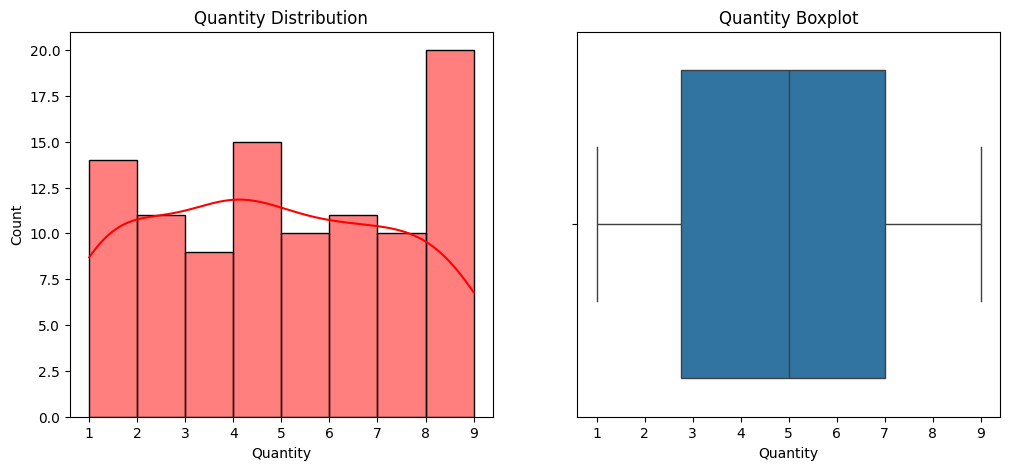

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['Quantity'], kde=True, ax=ax[0],color='r')
sns.boxplot(x=df['Quantity'], ax=ax[1])
ax[0].set_title("Quantity Distribution")
ax[1].set_title("Quantity Boxplot")
plt.show()

#### **4. Price**

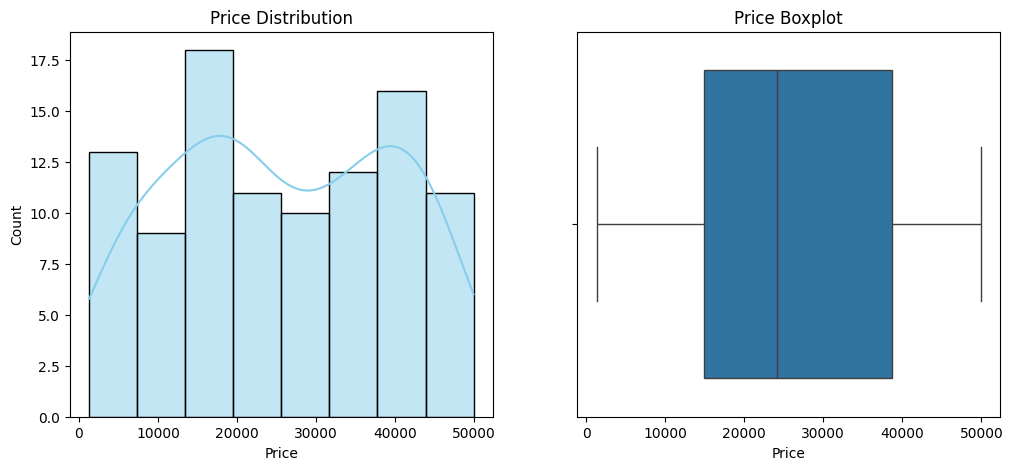

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['Price'], kde=True, ax=ax[0], color="skyblue")
sns.boxplot(x=df['Price'], ax=ax[1])
ax[0].set_title("Price Distribution")
ax[1].set_title("Price Boxplot")
plt.show()

#### **5. Customer_ID**

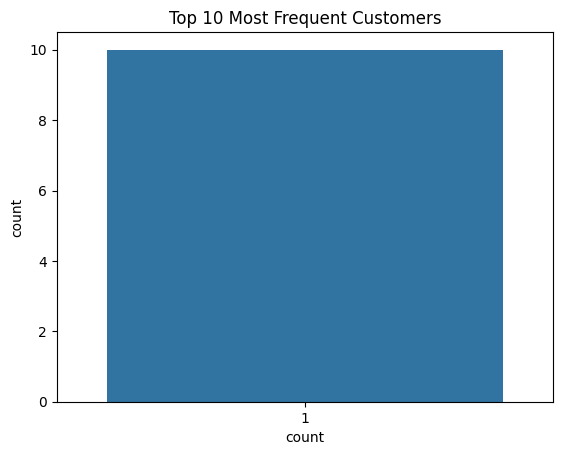

In [12]:
sns.countplot(x=df['Customer_ID'].value_counts().sort_values(ascending=False).head(10))
plt.title("Top 10 Most Frequent Customers")
plt.show()

#### **6. Region**

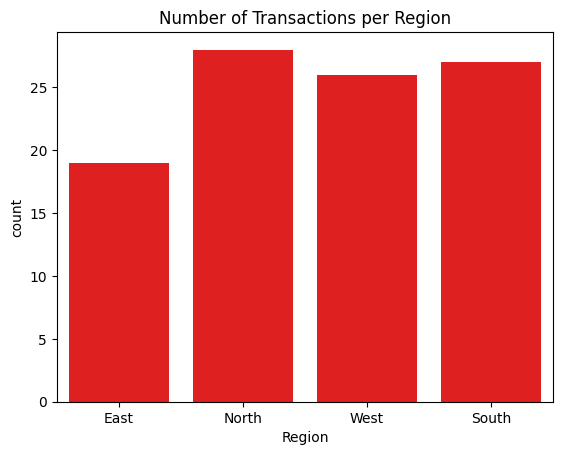

In [13]:
sns.countplot(x='Region', data=df,color="red")
plt.title("Number of Transactions per Region")
plt.show()

#### **7. Total_Sales**

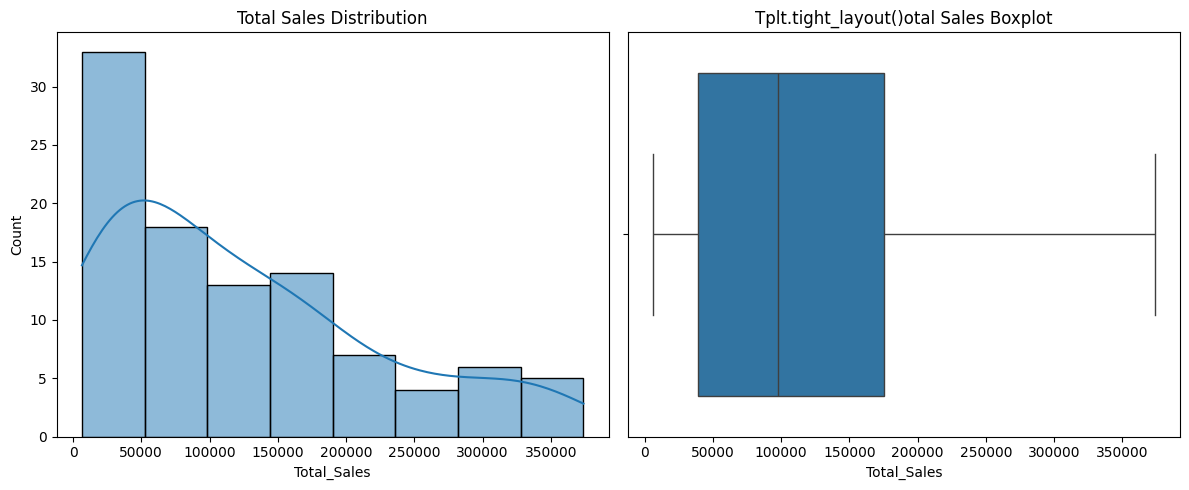

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df['Total_Sales'], kde=True, ax=ax[0])
sns.boxplot(x=df['Total_Sales'], ax=ax[1])
ax[0].set_title("Total Sales Distribution")
ax[1].set_title("Tplt.tight_layout()otal Sales Boxplot")
plt.tight_layout() 
plt.show()

## **Bivariate Visualization**

#### **1. Quantity vs Price**

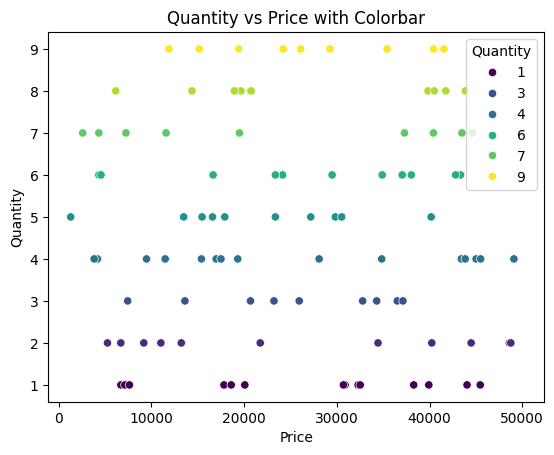

In [15]:
sns.scatterplot(data=df, x='Price', y='Quantity', hue='Quantity', palette='viridis')
plt.title("Quantity vs Price with Colorbar")
plt.show()

#### **2. Total_Sales vs Price / Quantity**

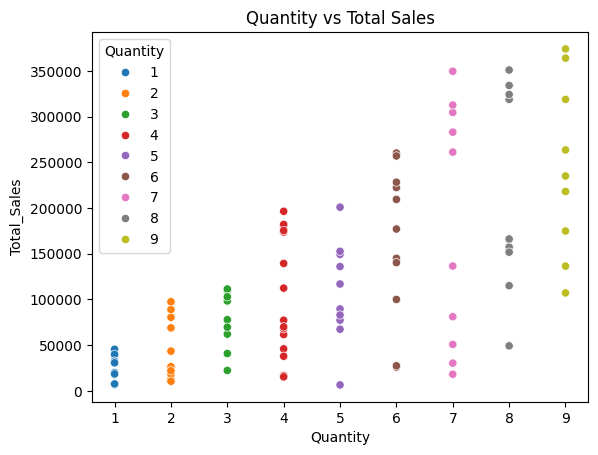

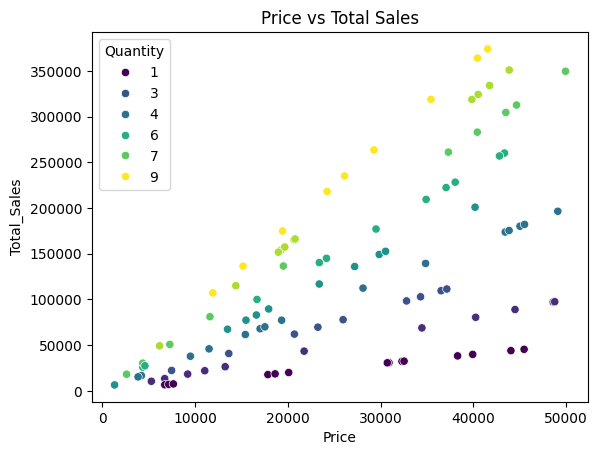

In [16]:
sns.scatterplot(data=df, x='Quantity', y='Total_Sales',hue='Quantity', palette='tab10')
plt.title("Quantity vs Total Sales")
plt.show()

sns.scatterplot(data=df, x='Price', y='Total_Sales',hue='Quantity', palette='viridis')
plt.title("Price vs Total Sales")
plt.show()

#### **3. Region vs Total_Sales**

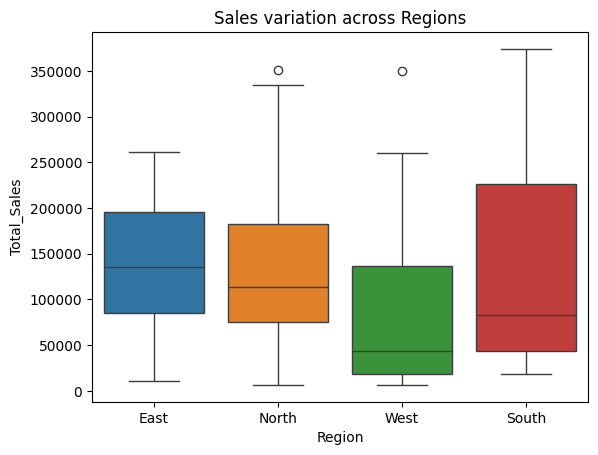

In [18]:
sns.boxplot(x='Region', y='Total_Sales', data=df,hue='Region')
plt.title("Sales variation across Regions")
plt.show()

#### **4. Product vs Total_Sales**

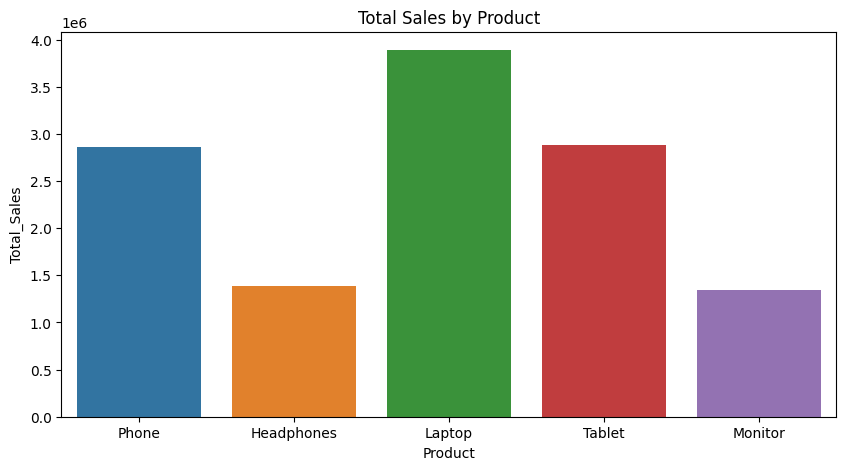

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product', y='Total_Sales', data=df, estimator=sum, ci=None, palette='tab10')
plt.title("Total Sales by Product")
plt.show()

#### **5. Date vs Total_Sales** 


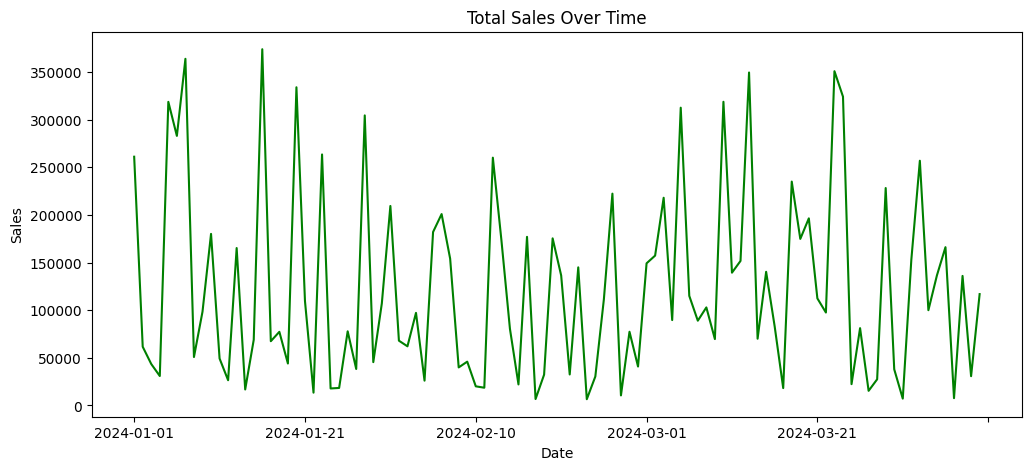

In [24]:
df.groupby('Date')['Total_Sales'].sum().plot(figsize=(12,5),color="green")
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

## **Multivariate Visualization**

#### **1. Total_Sales by Region and Product**

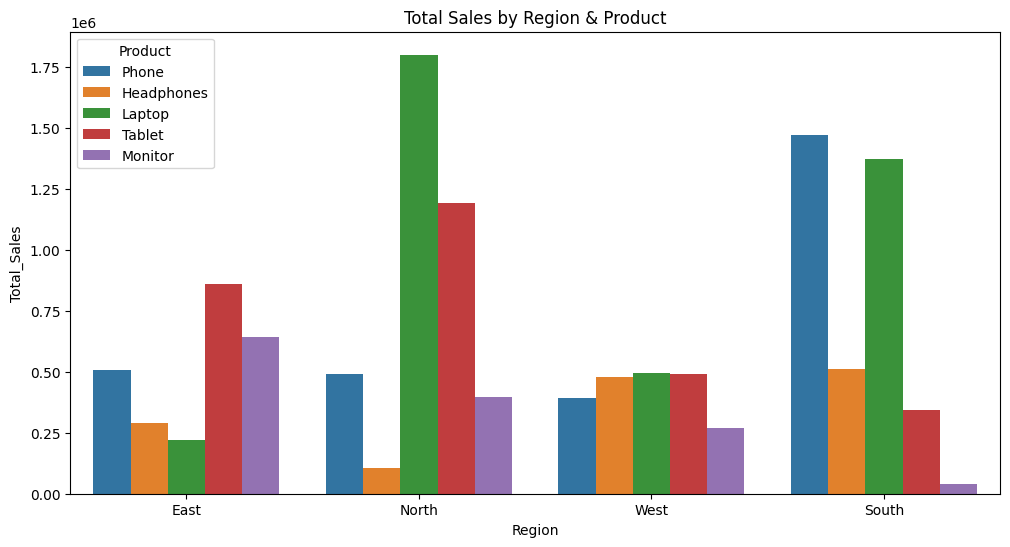

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Total_Sales', hue='Product', data=df, estimator=sum,ci=False)
plt.title("Total Sales by Region & Product")
plt.show()

#### **2. Price vs Quantity colored by Region**

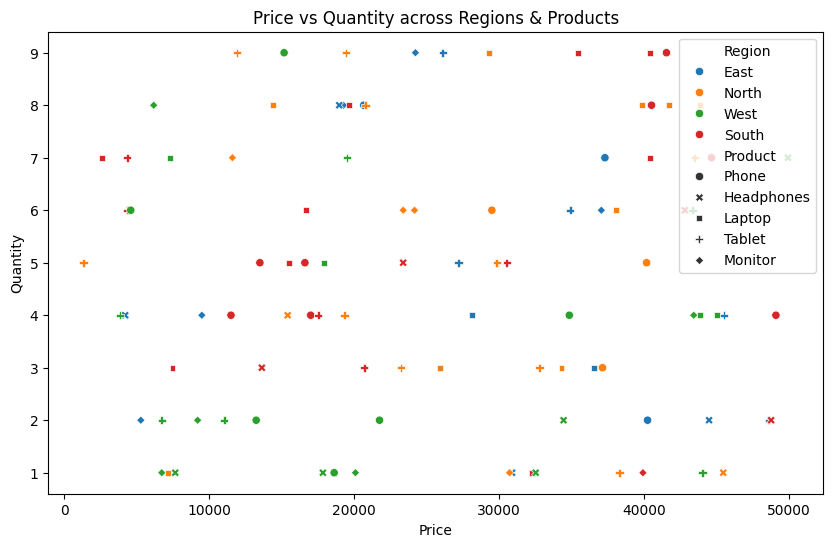

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price', y='Quantity', hue='Region', style='Product')
plt.title("Price vs Quantity across Regions & Products")
plt.show()

#### **3. Pairwise Relationships (pairplot)**

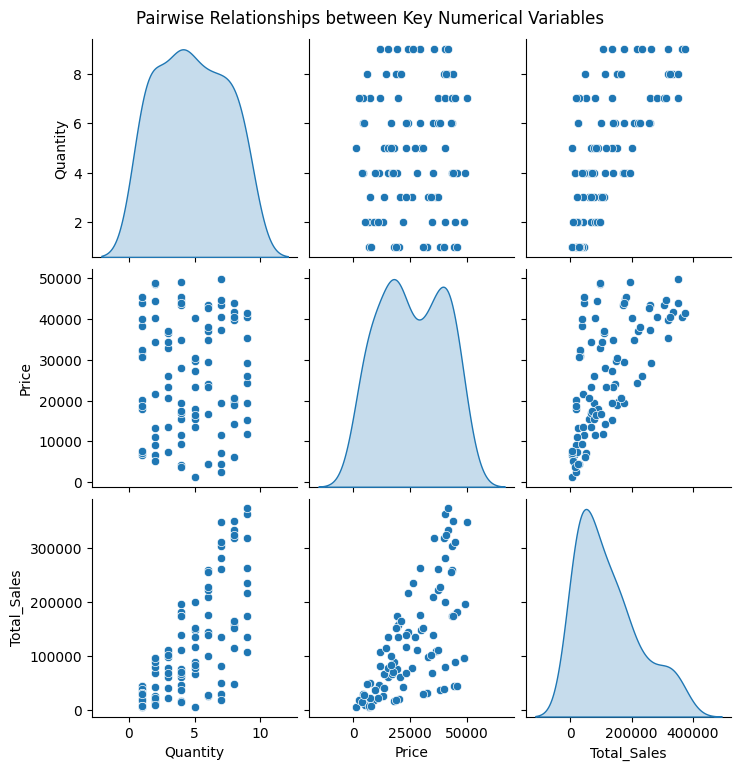

In [28]:
sns.pairplot(df[['Quantity', 'Price', 'Total_Sales']], diag_kind='kde')
plt.suptitle("Pairwise Relationships between Key Numerical Variables", y=1.02)
plt.show()

#### **4. Heatmap of Correlation**

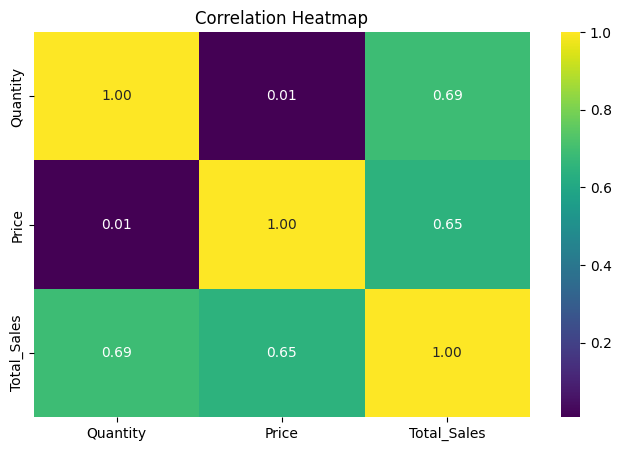

In [30]:
plt.figure(figsize=(8,5))
corr = df[['Quantity', 'Price', 'Total_Sales']].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### **5. Customer Segmentation: Region vs Product vs Total Sales**

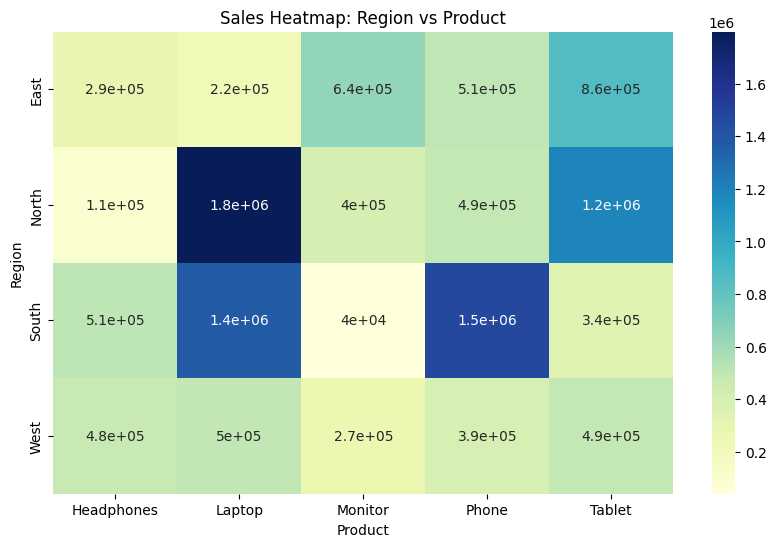

In [31]:
pivot = df.pivot_table(values='Total_Sales', index='Region', columns='Product', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Sales Heatmap: Region vs Product")
plt.show()